# 1. Подготовка данных и предварительный анализ

In [325]:
# Импортируем библиотеки
import pandas as pd
from pandas import Series
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [326]:
scoring = pd.read_csv("train-scoring.csv", encoding = 'ISO-8859-1', low_memory = False)

In [327]:
# Проверяем датасет
scoring.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


In [328]:
# Смотрим информацию по датасету, проверяем типы данных
scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [329]:
scr_profile = scoring.profile_report()

#### Ссылка на профайл **[the dataset profile report](./output.html)**.

In [330]:
scr_profile.to_file("scoring_profile.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [331]:
# Считаем количество пропусков по колонкам
scoring.isna().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

В данных о клиентах присутствуют переменные всех типов, не все имеют числовую запись, а также есть пропущенные значения. Значит, нам необходима предварительная очистка данных.

In [332]:
scoring.describe()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,2.000339,1.575509,2.496280,41099.775417,0.126994
std,31841.921168,11.520378,0.804272,0.371087,2.252073,0.527631,0.689818,46166.322400,0.332968
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20000.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,3.000000,2.000000,3.000000,48000.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,53.000000,3.000000,3.000000,1000000.000000,1.000000


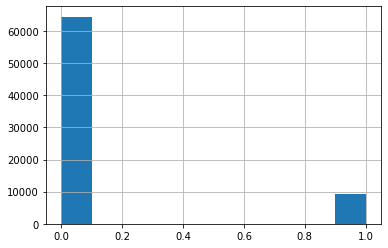

In [333]:
# Посмотрим на распределение целевой переменной
scoring.default.hist()

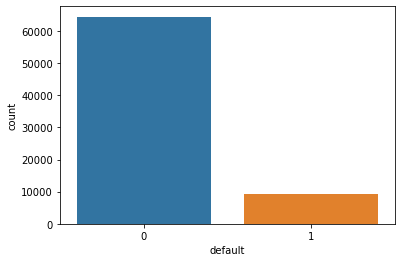

In [334]:
sns.countplot(x='default', data=scoring)

Клиентов, совершивших дефолт, значительно меньше, их количество не превышает 10000.

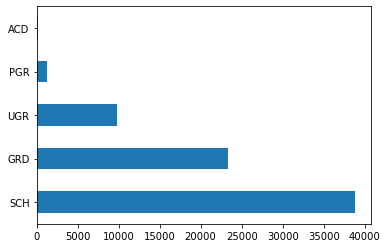

In [335]:
scoring['education'].value_counts().plot.barh()

In [336]:
# Заменим пропуски в данных модой
scoring['education'] = scoring['education'].apply(lambda x: scoring['education'].mode()[0]
                       if pd.isnull(x) == True else x)

In [337]:
# Проверим результат замены
scoring.isna().sum()

client_id           0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

In [338]:
for column in scoring.columns:
    print(scoring[column].value_counts())

6141     1
42113    1
29467    1
19228    1
21279    1
        ..
46588    1
48637    1
42494    1
87552    1
2049     1
Name: client_id, Length: 73799, dtype: int64
SCH    39167
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64
F    41562
M    32237
Name: sex, dtype: int64
31    2727
28    2705
30    2693
29    2659
27    2645
26    2528
32    2501
34    2395
33    2314
35    2259
25    2202
36    2159
37    2118
38    2088
39    2082
42    1973
40    1932
24    1873
41    1857
43    1770
44    1690
23    1509
45    1487
50    1424
47    1418
46    1407
48    1404
52    1387
51    1385
53    1326
54    1326
49    1304
55    1230
56    1114
57    1040
22     937
59     925
58     881
60     851
21     849
61     661
62     576
63     477
64     449
65     422
66     309
67     248
68     165
69      81
70      32
71       3
72       2
Name: age, dtype: int64
N    49832
Y    23967
Name: car, dtype: int64
N    59791
Y    14008
Name: car_type, dtype: int64


In [339]:
# Опишем переменные

# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

# 2. Анализ числовых переменных

## Нормализация величин и оценка зависимости их распределения от целевой переменной

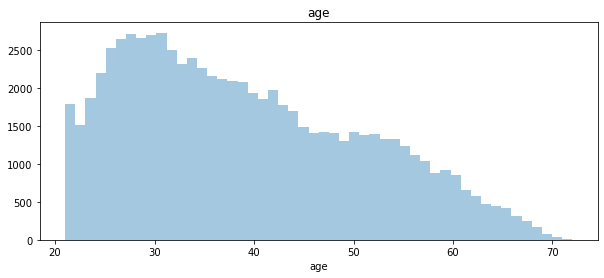

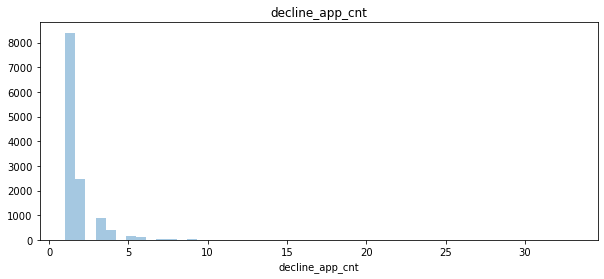

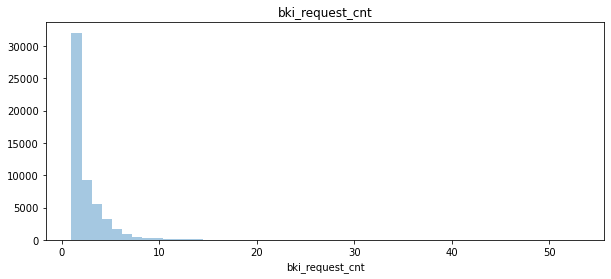

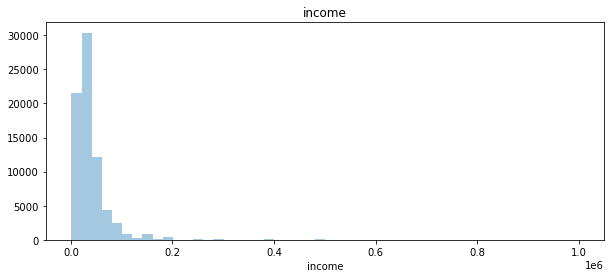

In [340]:
# Построим гистограммы распределения числовых величин
for i in num_cols:
    plt.figure(figsize=(10, 4))
    sns.distplot(scoring[i][scoring[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

Видим по графикам, что распределения смещены влево. Приведем их к более нормальному виду с помощью логарифмирования.

In [341]:
# Логарифмируем числовые колонки
for num_col in num_cols:
    scoring[num_col] = scoring[num_col].apply(lambda x: np.log(x + 1))

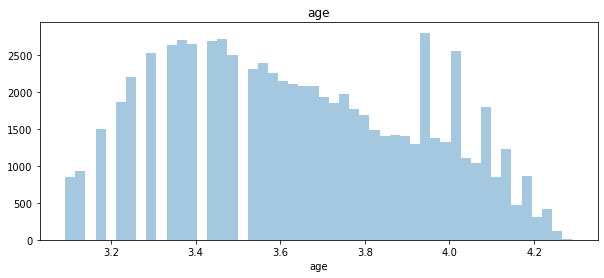

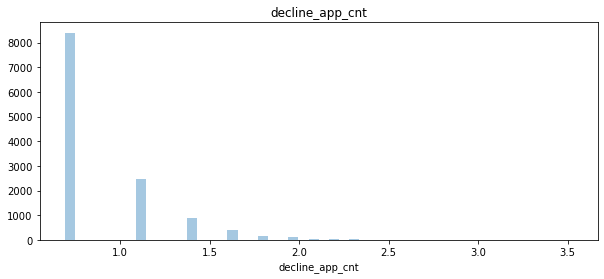

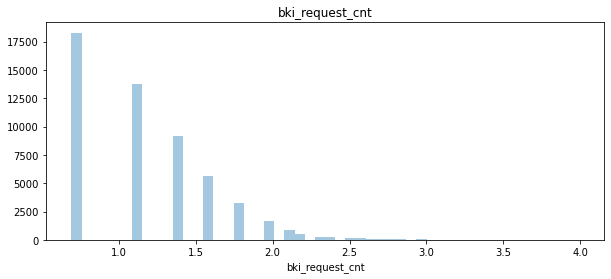

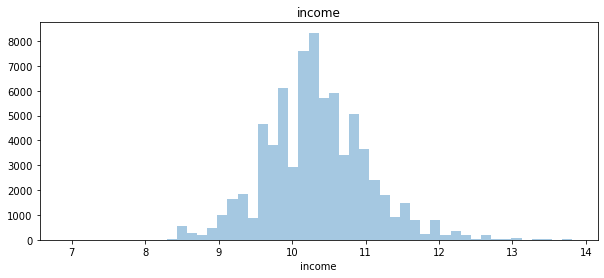

In [342]:
# Построим гистограммы логарифмированных данных
for i in num_cols:
    plt.figure(figsize=(10, 4))
    sns.distplot(scoring[i][scoring[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

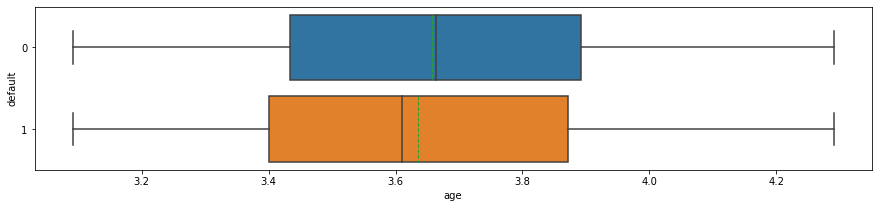

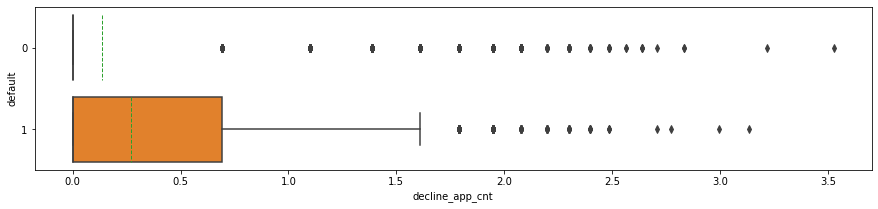

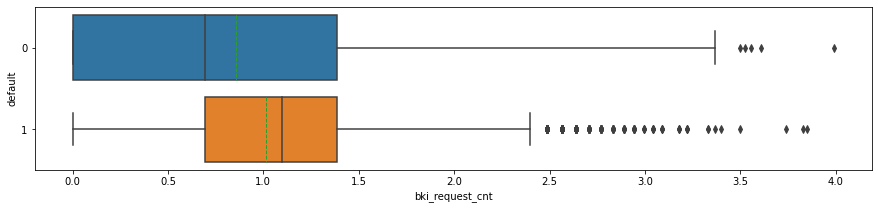

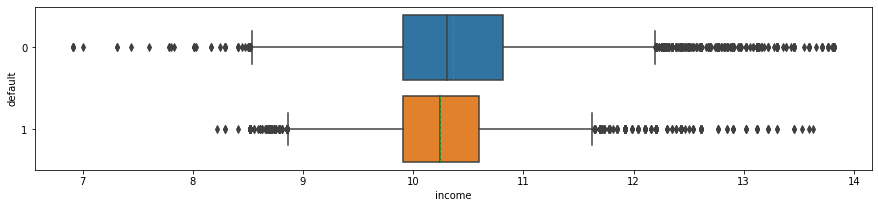

In [343]:
for col in num_cols:
    plt.figure(figsize=(15,3))
    sns.boxplot(y = scoring['default'], x = scoring[col],
            showmeans=True, meanline=True, orient = 'h')

Проверим на всякий случай медианное значение для decline_app_cnt

In [344]:
scoring[scoring['default'] == 1]['decline_app_cnt'].median()

0.0

In [345]:
scoring[scoring['default'] == 0]['decline_app_cnt'].median()

0.0

Мы не можем оценить медиану, поэтому построим гистограмму средних значений, полученную через сводную таблицу

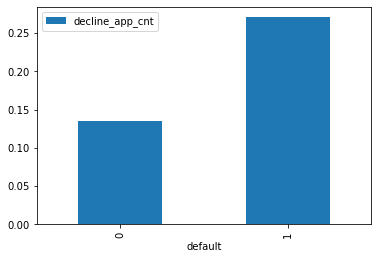

In [346]:
scoring.pivot_table(index = 'default', values = 'decline_app_cnt', aggfunc = 'mean').plot(kind = 'bar')

Мы видим, что клиенты с дефолтом в среднем более молодые, имели больше запросов в БКИ и больше отказов по заявкам, кроме этого у них немного меноше средний доход, чем у клиентов без дефолта.

## Оценка корреляции признаков и определение наиболее значимых из них

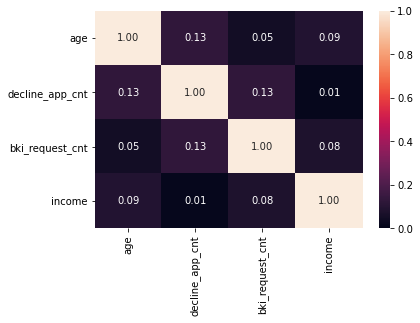

In [347]:
# Оценим корреляцию по Пирсону
sns.heatmap(scoring[num_cols].corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")

Можно сделать выводы о том, что в целом корреляция довольно слабая (не превышает 0,13). Но отдельно можно сказать, что количество отказов меньше всего связано с возрастом и доходом. То есть мы оставляем эти признаки в модели.

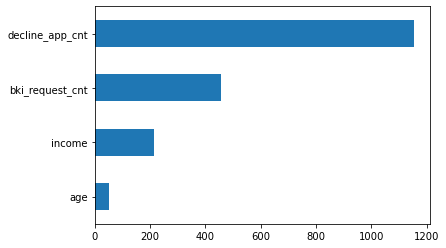

In [348]:
# Проведем оценку значимости признаков с помощью функции f_classif
# Визуализируем результат
imp_num = pd.Series(f_classif(scoring[num_cols], scoring['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самым значимым из числовых признаков оказывается количество отказов по заявкам.

# 3. Анализ категориальных переменных

In [349]:
# С помощью LabelEncoder преобразуем бинарные
# Выведем на всякий случай словари значений
label_encoder = LabelEncoder()

for column in bin_cols:
    
    scoring[column] = label_encoder.fit_transform(scoring[column])
    print(column,dict(enumerate(label_encoder.classes_)))

# убедимся в преобразовании    
scoring.head()

sex {0: 'F', 1: 'M'}
car {0: 'N', 1: 'Y'}
car_type {0: 'N', 1: 'Y'}
good_work {0: 0, 1: 1}
foreign_passport {0: 'N', 1: 'Y'}


,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,4.143135,1,1,0.000000,0,0.693147,1,2,9.798183,0,0
1,63161,SCH,0,4.094345,0,0,0.000000,0,1.386294,2,3,9.852247,0,0
2,25887,SCH,1,3.258097,1,0,1.098612,0,0.693147,1,2,10.308986,1,0
3,16222,SCH,0,3.988984,0,0,0.000000,0,1.098612,2,3,9.210440,0,0
4,101655,GRD,1,3.891820,0,0,0.000000,1,0.693147,2,3,10.308986,1,0


In [350]:
# scoring['education'] = label_encoder.fit_transform(scoring['education'])
# print(column,dict(enumerate(label_encoder.classes_)))

In [351]:
ed_dict = {'SCH': 0, 'UGR': 1, 'GRD': 2, 'PGR': 3, 'ACD': 4}
scoring['education'] = scoring['education'].replace(ed_dict)

In [352]:
scoring.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,0,1,4.143135,1,1,0.000000,0,0.693147,1,2,9.798183,0,0
1,63161,0,0,4.094345,0,0,0.000000,0,1.386294,2,3,9.852247,0,0
2,25887,0,1,3.258097,1,0,1.098612,0,0.693147,1,2,10.308986,1,0
3,16222,0,0,3.988984,0,0,0.000000,0,1.098612,2,3,9.210440,0,0
4,101655,2,1,3.891820,0,0,0.000000,1,0.693147,2,3,10.308986,1,0


## Оценка значимости категориальных переменных

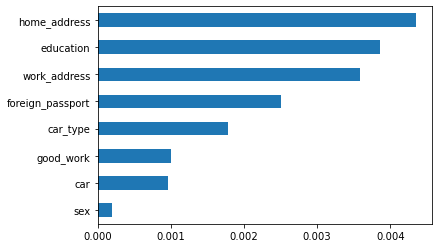

In [353]:
imp_cat = Series(mutual_info_classif(scoring[bin_cols + cat_cols], scoring['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Самым важным категориальным признаком оказался home_address, наименьшую важность имеет признак sex.

# 3. Подготовка данных к машинному обучению

In [354]:
X_cat = OneHotEncoder(sparse = False).fit_transform(scoring[cat_cols].values)

In [355]:
display(X_cat)

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [356]:
X_cat.shape

(73799, 11)

In [357]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(scoring[num_cols].values)

In [358]:
# Объединяем

X = np.hstack([X_num, scoring[bin_cols].values, X_cat])
Y = scoring['default'].values

## Разбиение выборки, построение модели

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


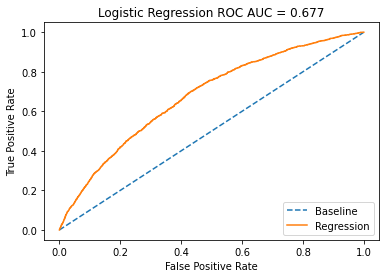

In [360]:
model = LogisticRegression() # Логистическая регрессия
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

# Считаем и строим ROC-кривую
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Регуляризация и подбор гиперпараметров

In [361]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Ivan/opt/anacond

/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/Ivan/opt/anaconda3

Лучшее Penalty: l2
Лучшее C: 1.0


/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
mapp = {}
label_encoder = LabelEncoder()
for col in bin_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mapp[col] = dict(enumerate(label_encoder.classes_))
mappc = {}
enc = OneHotEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappc[col] = dict(enumerate(label_encoder.classes_))
print(mapp)
print(mappc)
{'sex': {0: 'F', 1: 'M'}, 'car': {0: 'N', 1: 'Y'}, 'car_type': {0: 'N', 1: 'Y'}, 'good_work': {0: 0, 1: 1}, 'foreign_passport': {0: 'N', 1: 'Y'}}
{'education': {0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}, 'work_address': {0: 1, 1: 2, 2: 3}, 'home_address': {0: 1, 1: 2, 2: 3}, 'sna': {0: 1, 1: 2, 2: 3, 3: 4}, 'first_time': {0: 1, 1: 2, 2: 3, 3: 4}}
df.columns
Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'sample',
       'mean_income_age', 'max_income_age', 'normalized_income',
       'mean_requests_age', 'mean_requests_income', 'mean_income_region'],
      dtype='object')
# need to rename the columns
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','app_date', 'mean_income_age','region_rating','max_income_age', 'normalized_income',
       'mean_requests_age', 'mean_requests_income', 'mean_income_region'] # numerical
cat_cols = ['education','work_address','home_address','sna','first_time'] # categorical
bin_cols = ['sex','car','car_type','good_work','foreign_passport'] # binary